# Aim

Analyze data from the SEAL tests.

For the closed-loop tests, demonstrate the potential model problems.


In [7]:
# imports
import os
from os import path, listdir
import numpy as np
from matplotlib import pyplot as plt
import re
from toolz import pipe

In [28]:
import sys
sys.path.append("..")
from src.utils import genpsd, rms
datapath = path.join("..", "data")
ol = np.load(path.join(datapath, "openloop", "ol_tt_stamp_21_08_2021_08_56_31.npy"))
ol_spectra = [genpsd(ol[:,i], dt=0.01) for i in range(2)]

In [29]:
lqg_path = path.join(datapath, "lqg")
lqg_files = pipe(
    listdir(lqg_path),
    lambda files: filter(lambda f: not re.search("time", f), files),
    list
)
len(lqg_files)

177

In [30]:
def plot_cl_rtf(f):
    ttvals = np.load(path.join(lqg_path, f))
    fig, axs = plt.subplots(2, figsize=(9,9))
    fig.tight_layout(pad=4.0)
    plt.suptitle("LQG rejection")
    for mode in range(2):
        cl = ttvals[:,mode]
        olc = ol[:len(cl),mode]
        f_ol, p_ol = genpsd(olc, dt=0.01)
        f_cl, p_cl = genpsd(cl, dt=0.01)
        rms_ratio = rms(cl) / rms(olc)
        rms_ratio = str(np.round(rms_ratio, 4))[:7]
        axs[mode].loglog(f_ol, p_ol, label="Open-loop")
        axs[mode].loglog(f_cl, p_cl, label="Closed-loop")
        axs[mode].loglog(f_cl, p_cl / p_ol, label="Rejection TF")
        axs[mode].legend()
        axs[mode].set_xlabel("Frequency (Hz)")
        axs[mode].set_ylabel(r"Power (DM $units^2/Hz$)")
        axs[mode].set_title("Mode {0}, CL/OL RMS {1}".format(mode, rms_ratio))

    plt.show()

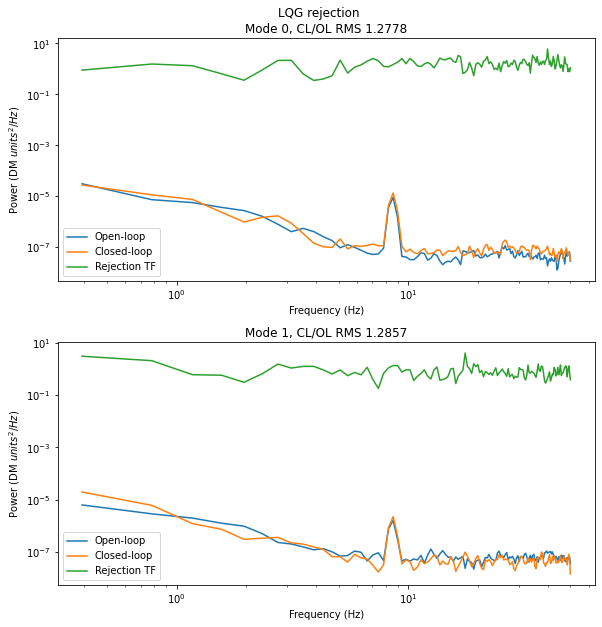

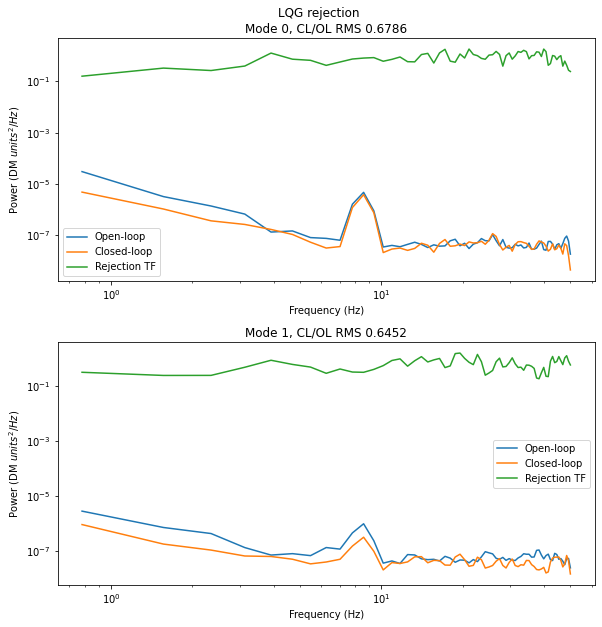

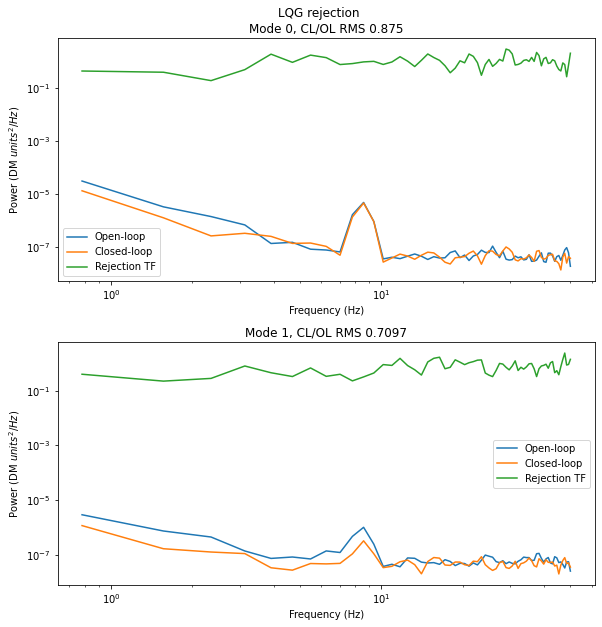

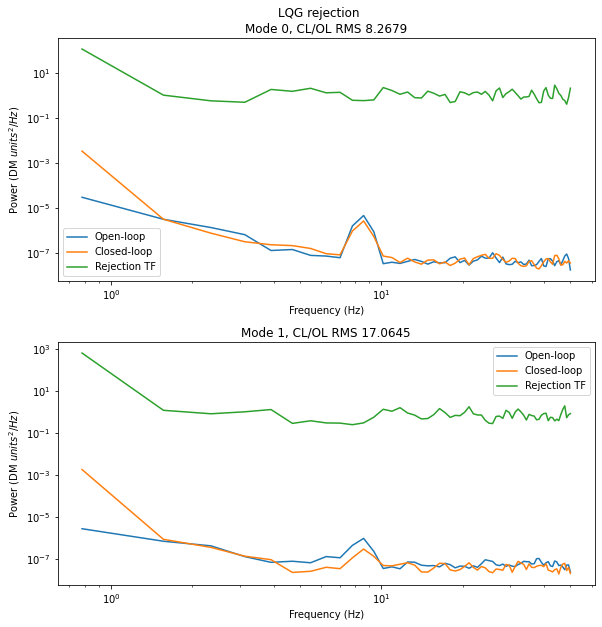

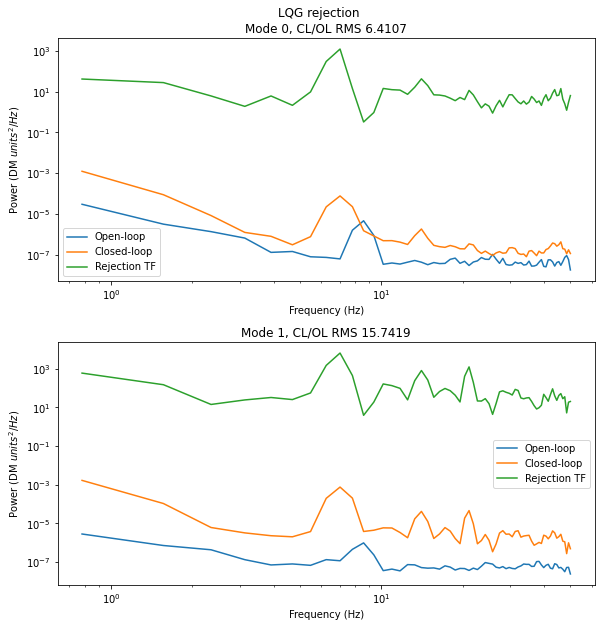

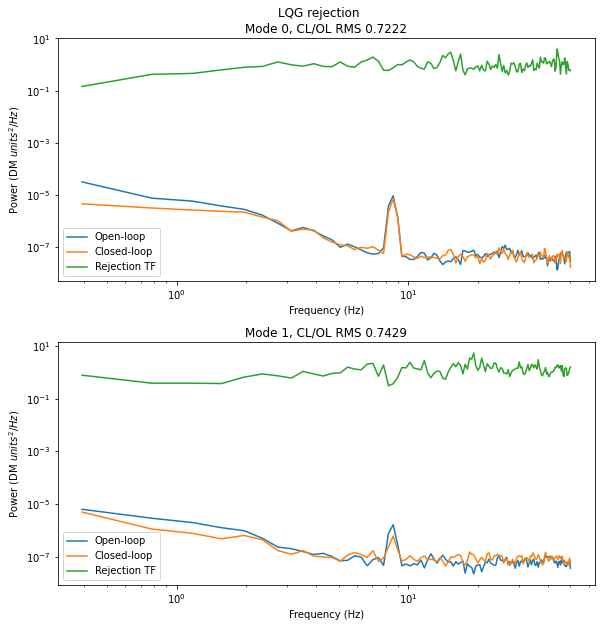

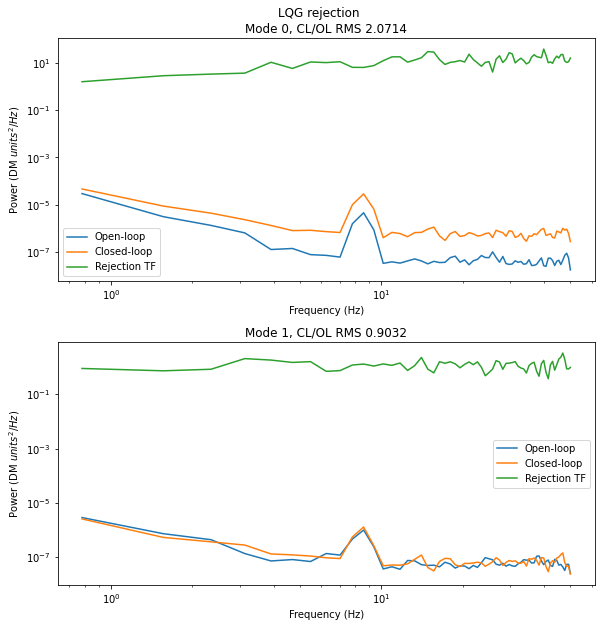

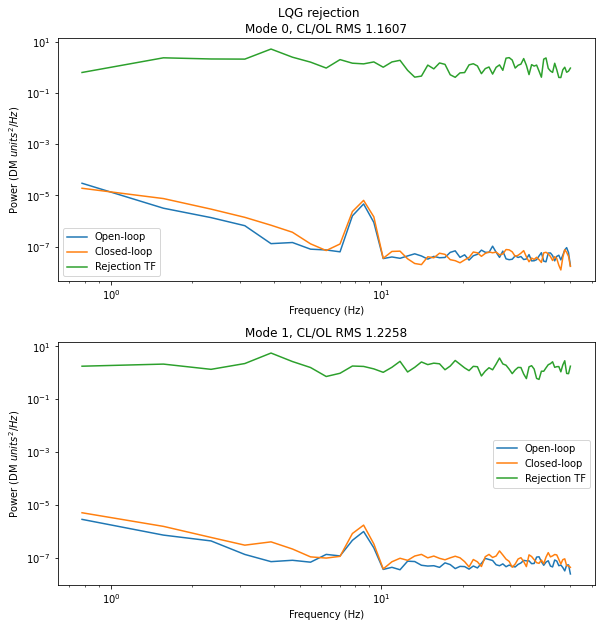

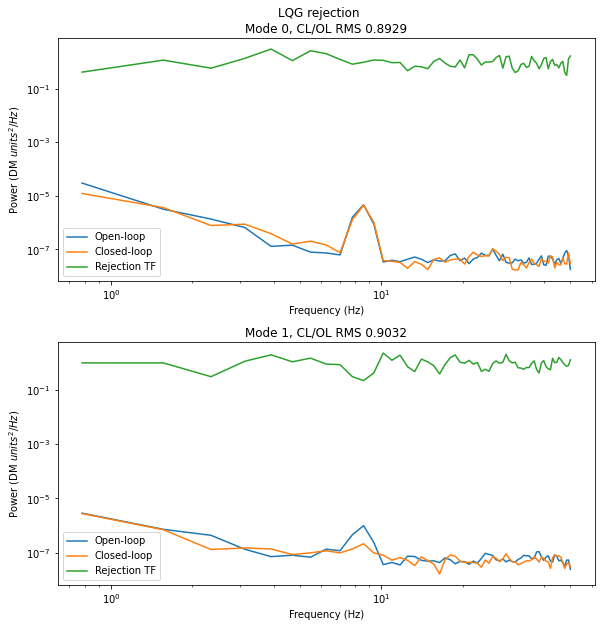

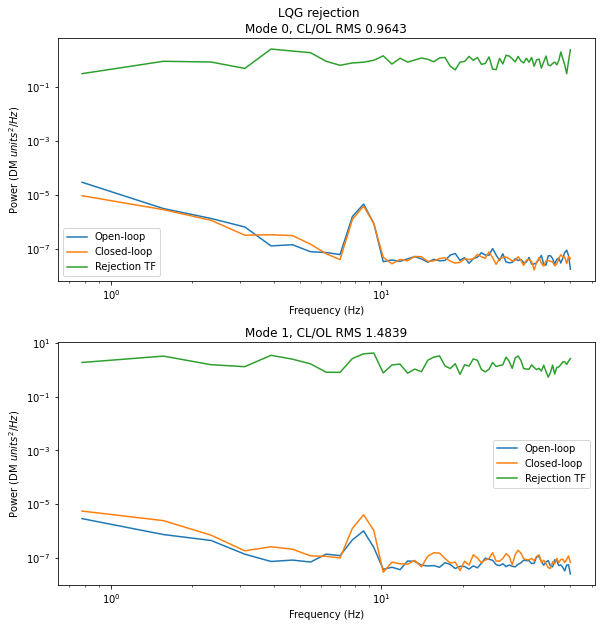

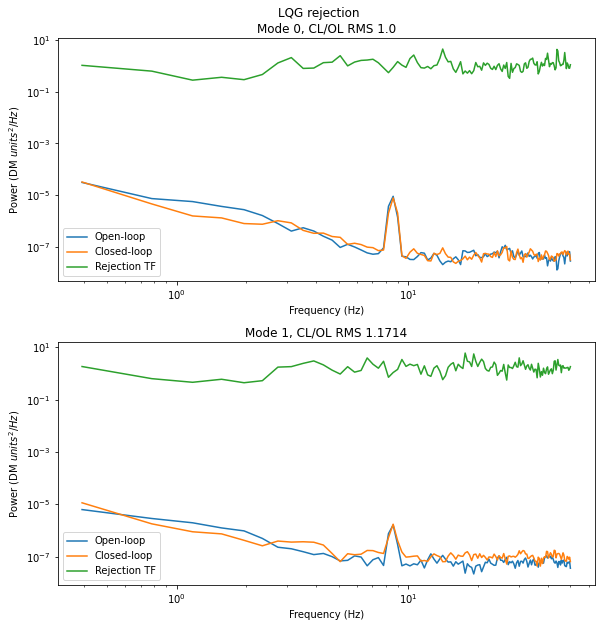

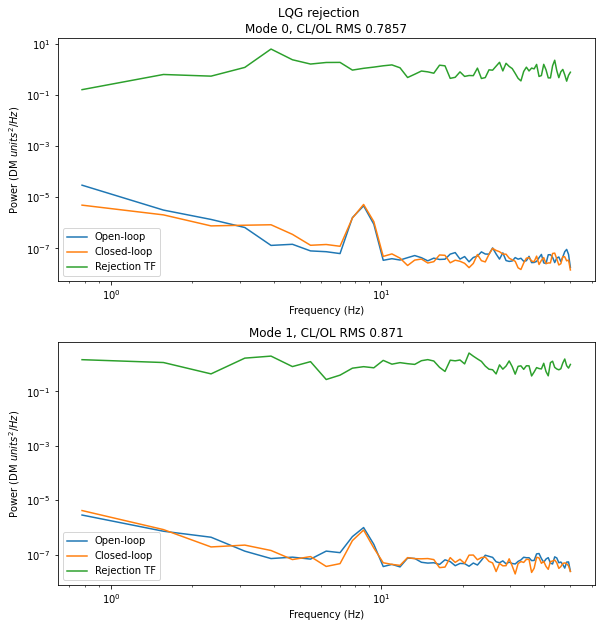

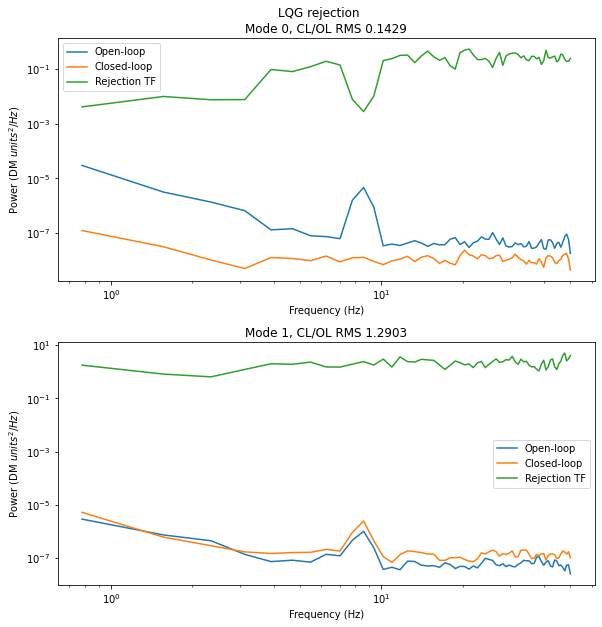

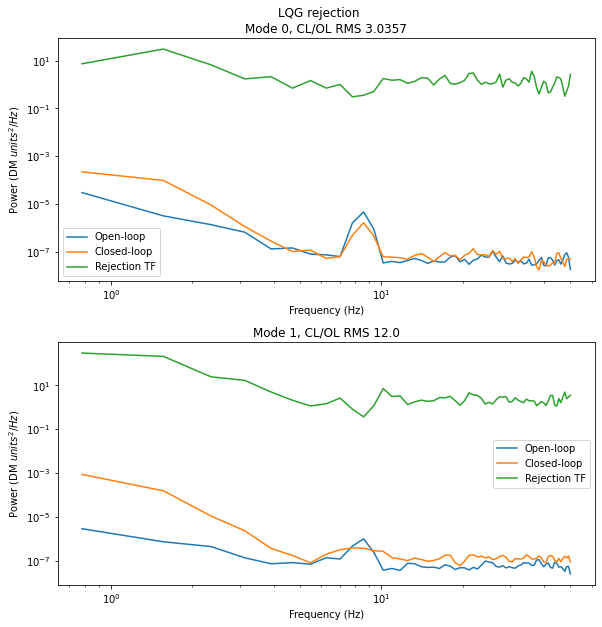

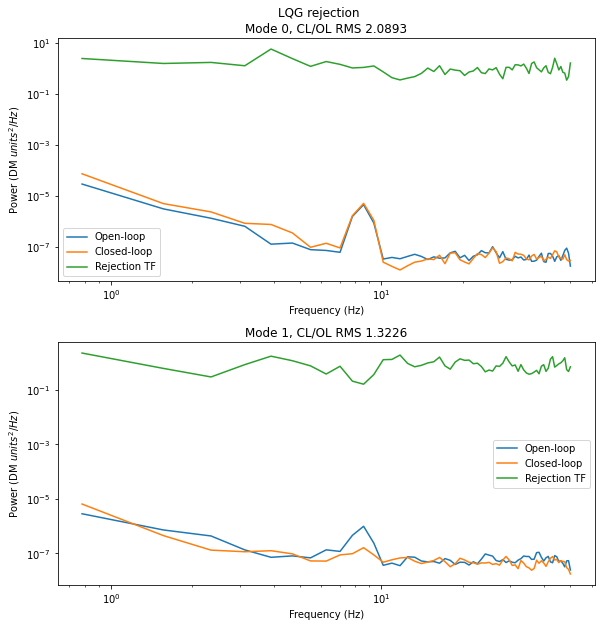

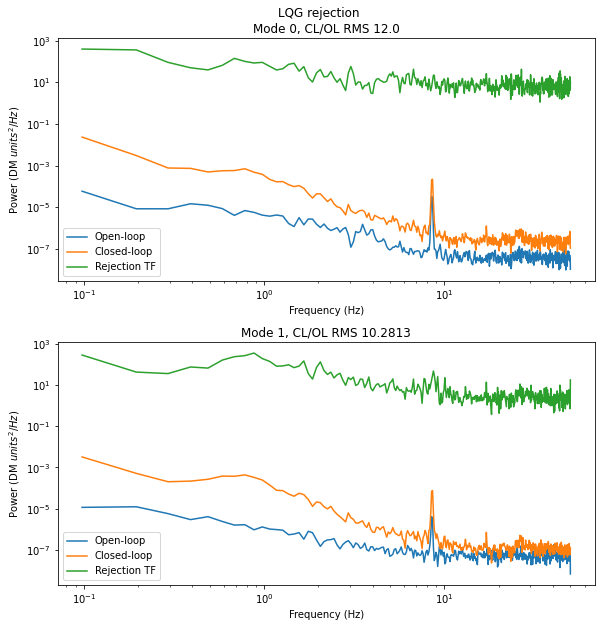

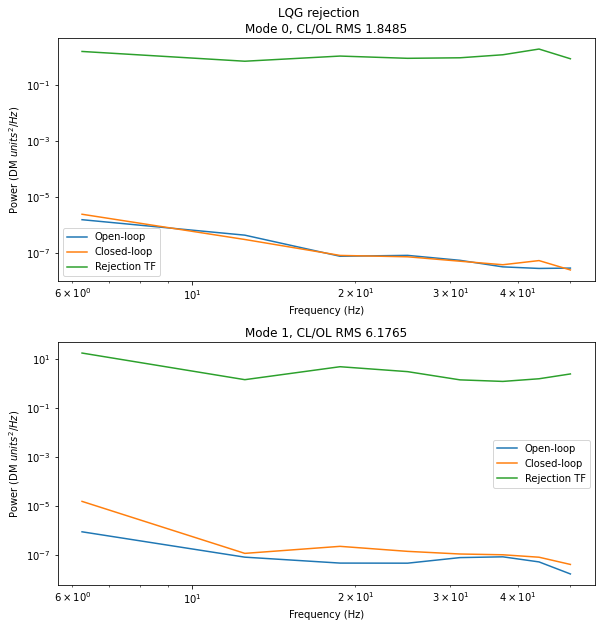

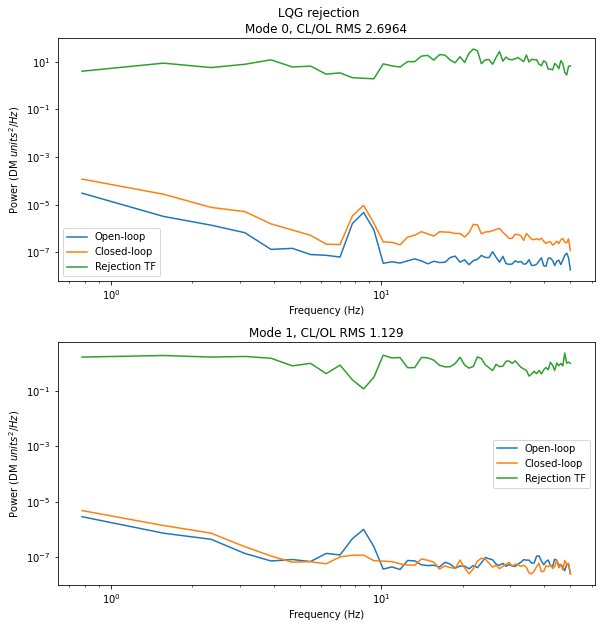

In [31]:
for f in lqg_files[::10]:
    plot_cl_rtf(f)